<a href="https://colab.research.google.com/github/shreyasavant/INSE_6220_Project/blob/main/Brain_Tumor_Classification_Using_Principal_Component_Analysis_and_Machine_Learning_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 26.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This 

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/brain_tumor.csv')
df.head(25)

Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0    Image1      0   6.535339   619.587845           24.891522  0.109059   
1    Image2      0   8.749969   805.957634           28.389393  0.266538   
2    Image3      1   7.341095  1143.808219           33.820234  0.001467   
3    Image4      1   5.958145   959.711985           30.979219  0.001477   
4    Image5      0   7.315231   729.540579           27.010009  0.146761   
5    Image6      0   7.524109   607.395258           24.645390  0.214086   
6    Image7      0  12.304413   922.746138           30.376737  0.128833   
7    Image8      0  15.929474  1069.950248           32.710094  0.107658   
8    Image9      0  19.921616  1166.120922           34.148513  0.094975   
9   Image10      1   8.476196  1095.785127           33.102645  0.003002   
10  Image11      1   9.804611  1114.829653           33.389065  0.002436   
11  Image12      1  12.326782  1150.677144           33.921632  0.003769   
12  Image13      1  10.193466   813.924363           28.529360  0.009774   
13  Image14      0   7.156311   413.438221           20.333180  0.081825   
14  Image15      0   5.291473   430.963766           20.759667  0.354116   
15  Image16      1  12.773941   988.403172           31.438880  0.002234   
16  Image17      1  15.317520  1076.878002           32.815819  0.004808   
17  Image18      0   6.246719   459.398171           21.433576  0.121085   
18  Image19      0   5.450424   337.879291           18.381493  0.112746   
19  Image20      0   8.333740   475.782357           21.812436  0.204902   
20  Image21      0   6.339523   293.878381           17.142881  0.069965   
21  Image22      0   1.480270    62.091259            7.879801  0.132055   
22  Image23      0   4.506058   280.829159           16.757958  0.133243   
23  Image24      0   6.592896   392.211339           19.804326  0.204876   
24  Image25      0  10.964294   619.832925           24.896444  0.126598   

    Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0   4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1   3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2   5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3   5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4   4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   
5   3.729886  14.471736  105.077882  0.421587  0.177736     0.598169   
6   2.930095   8.969348  115.203118  0.320675  0.102832     0.532292   
7   2.484002   6.515889   94.874288  0.291321  0.084868     0.532262   
8   2.129173   4.905844   93.818920  0.272486  0.074248     0.526644   
9   4.365000  19.682514   72.588783  0.045685  0.002087     0.361432   
10  3.872728  15.552862   66.285462  0.041140  0.001692     0.375618   
11  3.623978  14.762270  165.484791  0.051321  0.002634     0.385292   
12  3.359135  12.181670  110.568643  0.083284  0.006936     0.470426   
13  3.179781  10.287347  122.402664  0.250908  0.062955     0.583889   
14  4.369184  19.631920   46.864291  0.555340  0.308402     0.721321   
15  3.195462  11.101879   84.664102  0.039396  0.001552     0.373190   
16  2.834834   8.814872  102.248415  0.058073  0.003372     0.399251   
17  3.805883  14.767427   95.858505  0.309860  0.096014     0.559772   
18  3.765108  14.528132   63.184771  0.297823  0.088699     0.620169   
19  3.078875   9.949499   71.209578  0.411427  0.169272     0.652962   
20  3.180849  10.439426   92.845710  0.231418  0.053554     0.523958   
21  5.944518  36.987398   86.343915  0.324793  0.105490     0.535062   
22  4.153133  17.768020   52.554540  0.326223  0.106421     0.581162   
23  3.438675  12.254435   73.957241  0.411389  0.169241     0.635297   
24  2.720563   7.775729   91.605900  0.317505  0.100810     0.564082   

    Dissimilarity  Correlation  
0        4.473346     0.981939  
1        3.220072     0.988834  
2        5.981800     0.978014  
3        7.700919     0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 411.6+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

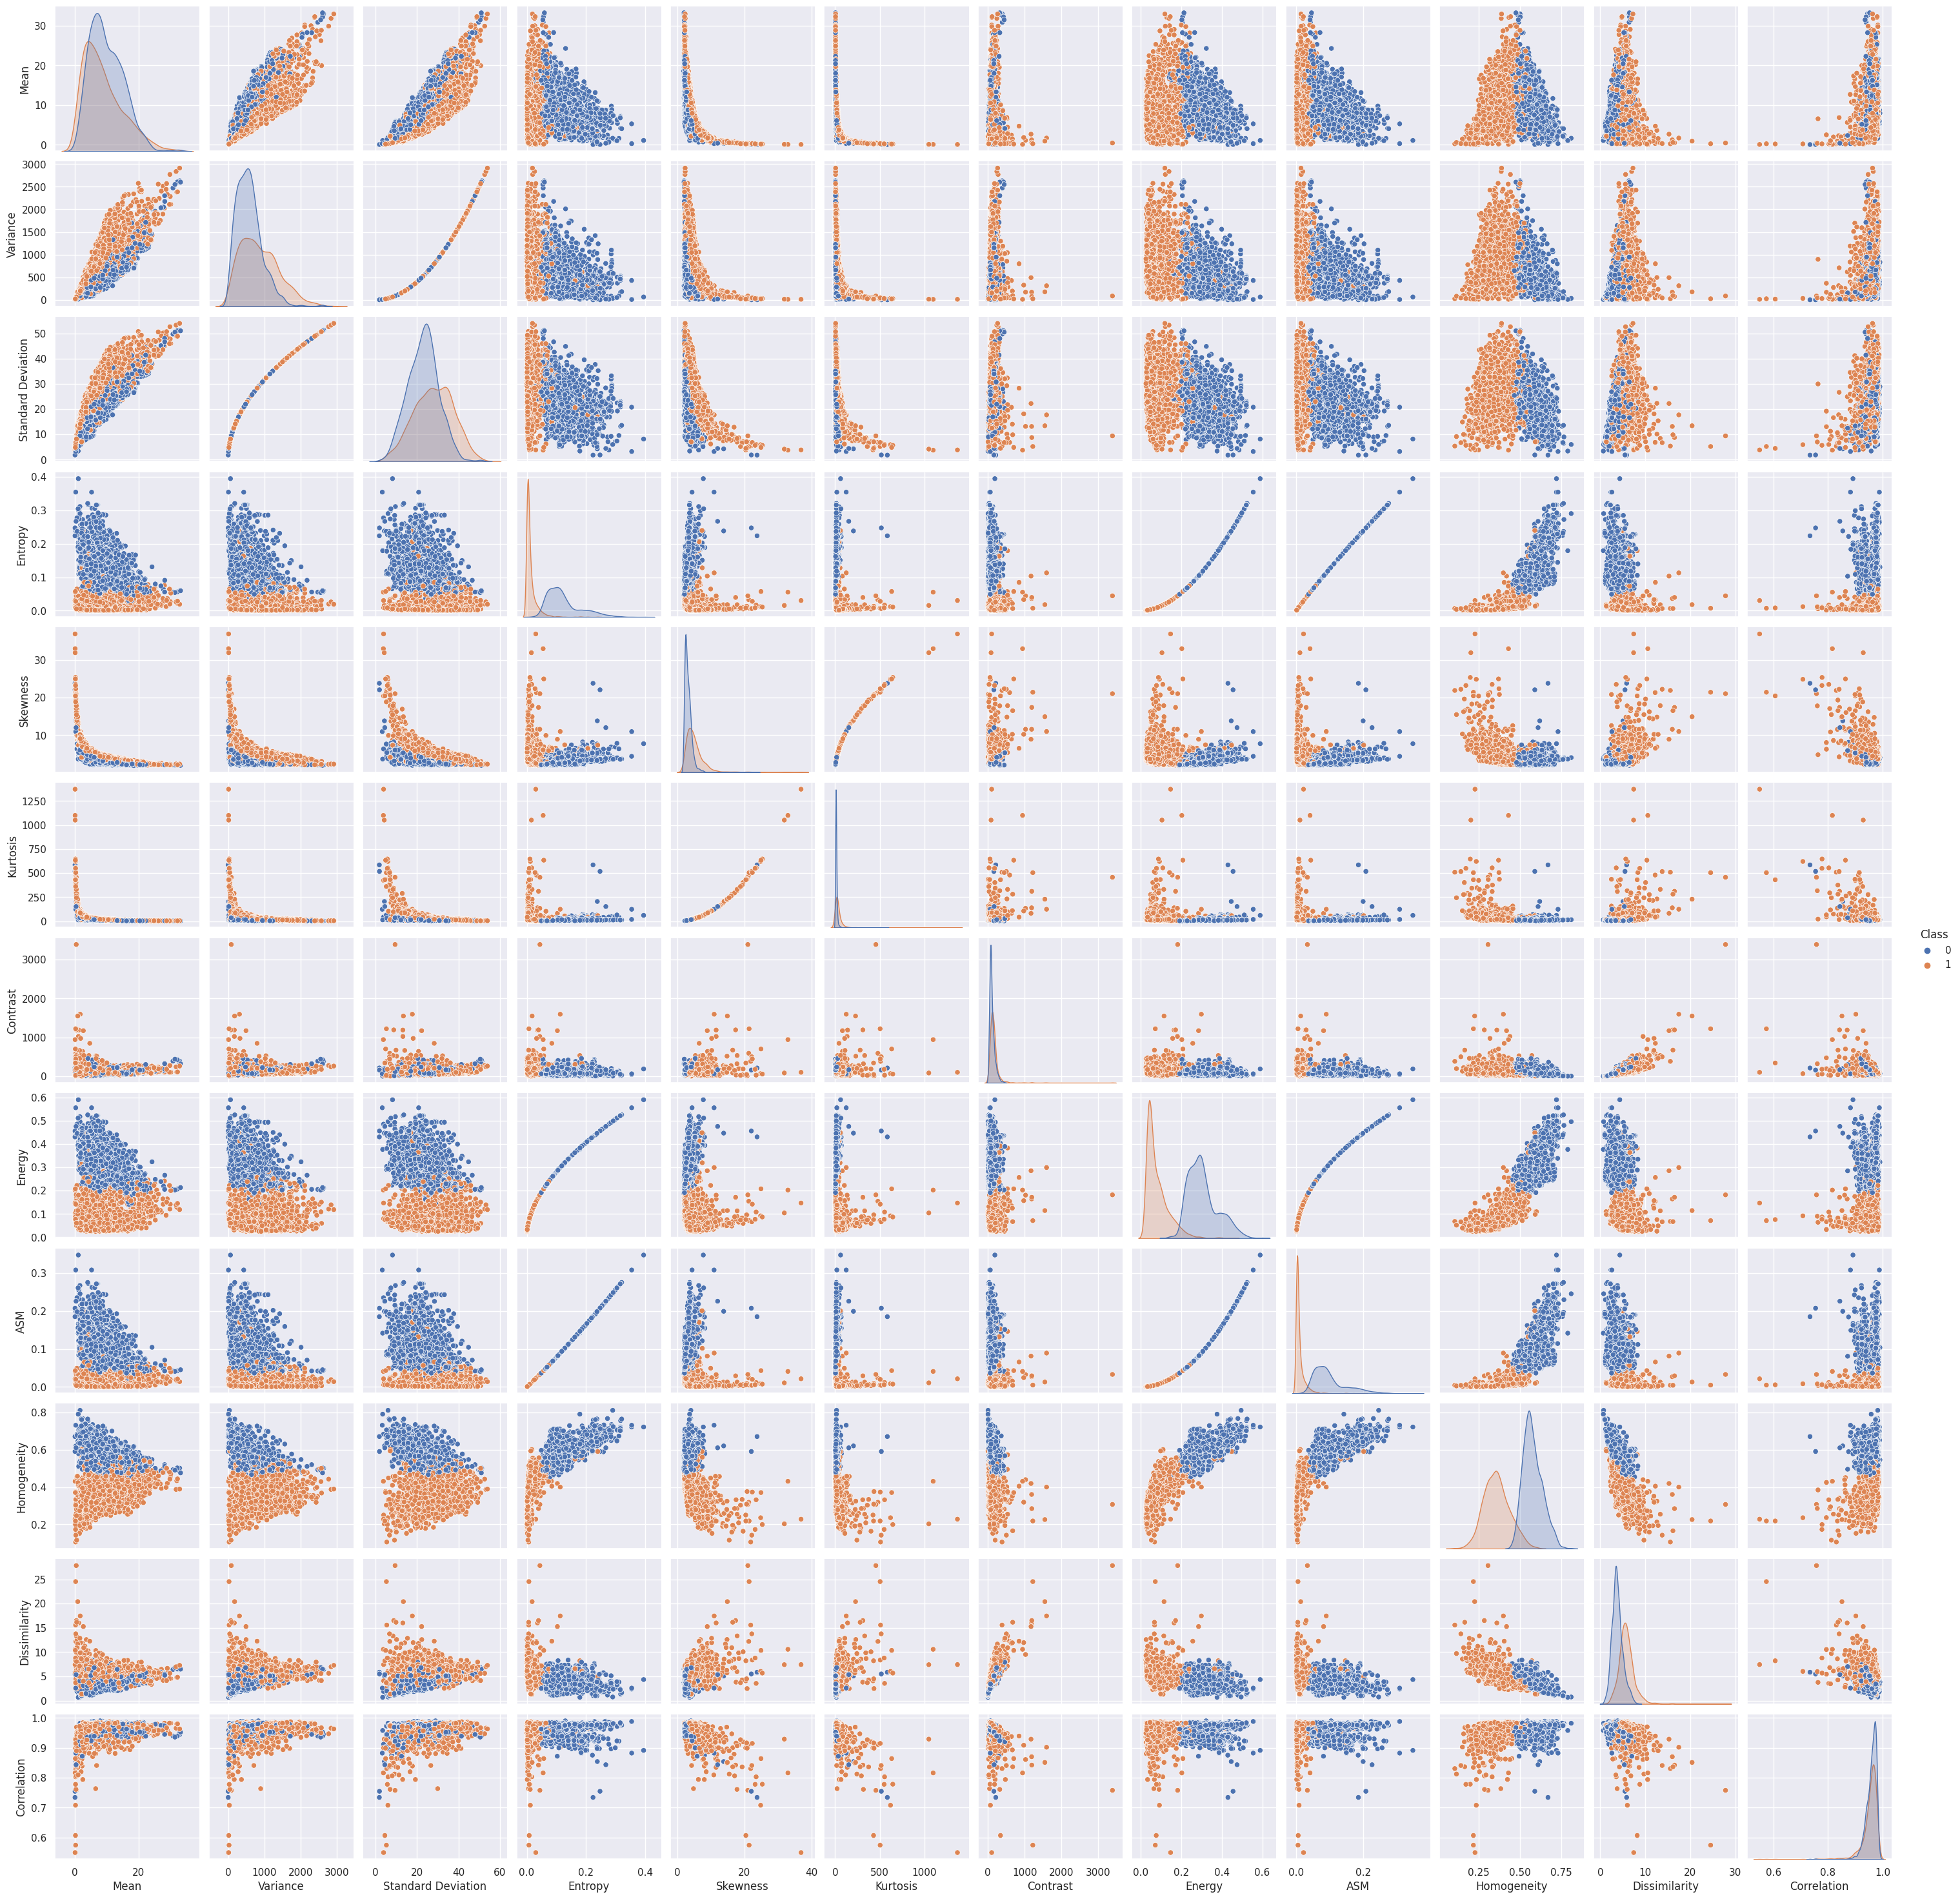

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

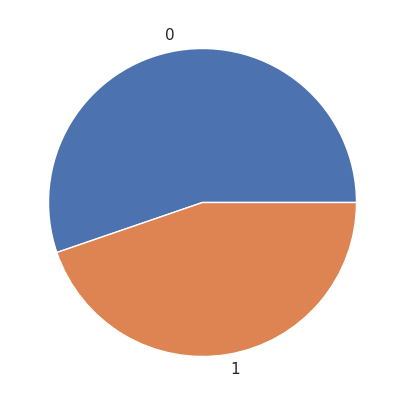

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Class','Image'])
X.head(10)

Mean     Variance  Standard Deviation   Entropy  Skewness   Kurtosis  \
0   6.535339   619.587845           24.891522  0.109059  4.276477  18.900575   
1   8.749969   805.957634           28.389393  0.266538  3.718116  14.464618   
2   7.341095  1143.808219           33.820234  0.001467  5.061750  26.479563   
3   5.958145   959.711985           30.979219  0.001477  5.677977  33.428845   
4   7.315231   729.540579           27.010009  0.146761  4.283221  19.079108   
5   7.524109   607.395258           24.645390  0.214086  3.729886  14.471736   
6  12.304413   922.746138           30.376737  0.128833  2.930095   8.969348   
7  15.929474  1069.950248           32.710094  0.107658  2.484002   6.515889   
8  19.921616  1166.120922           34.148513  0.094975  2.129173   4.905844   
9   8.476196  1095.785127           33.102645  0.003002  4.365000  19.682514   

     Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0   98.613971  0.293314  0.086033     0.530941       4.473346     0.981939  
1   63.858816  0.475051  0.225674     0.651352       3.220072     0.988834  
2   81.867206  0.031917  0.001019     0.268275       5.981800     0.978014  
3  151.229741  0.032024  0.001026     0.243851       7.700919     0.964189  
4  174.988756  0.343849  0.118232     0.501140       6.834689     0.972789  
5  105.077882  0.421587  0.177736     0.598169       4.193146     0.976485  
6  115.203118  0.320675  0.102832     0.532292       4.880320     0.974745  
7   94.874288  0.291321  0.084868     0.532262       4.242054     0.976774  
8   93.818920  0.272486  0.074248     0.526644       4.027167     0.974310  
9   72.588783  0.045685  0.002087     0.361432       4.590795     0.967830

In [ ]:
X.describe().transpose()

count        mean         std       min         25%  \
Mean                3762.0    9.488890    5.728022  0.078659    4.982395   
Variance            3762.0  711.101063  467.466896  3.145628  363.225459   
Standard Deviation  3762.0   25.182271    8.773526  1.773592   19.058475   
Entropy             3762.0    0.073603    0.070269  0.000882    0.006856   
Skewness            3762.0    4.102727    2.560940  1.886014    2.620203   
Kurtosis            3762.0   24.389071   56.434747  3.942402    7.252852   
Contrast            3762.0  127.961459  109.499601  3.194733   72.125208   
Energy              3762.0    0.204705    0.129352  0.024731    0.069617   
ASM                 3762.0    0.058632    0.058300  0.000612    0.004847   
Homogeneity         3762.0    0.479252    0.127929  0.105490    0.364973   
Dissimilarity       3762.0    4.698498    1.850173  0.681121    3.412363   
Correlation         3762.0    0.955767    0.026157  0.549426    0.947138   

                           50%         75%          max  
Mean                  8.477531   13.212723    33.239975  
Variance            622.580417  966.954319  2910.581879  
Standard Deviation   24.951560   31.095889    53.949809  
Entropy               0.066628    0.113284     0.394539  
Skewness              3.422210    4.651737    36.931294  
Kurtosis             12.359088   22.640304  1371.640060  
Contrast            106.737418  161.059006  3382.574163  
Energy                0.225496    0.298901     0.589682  
ASM                   0.050849    0.089342     0.347725  
Homogeneity           0.512551    0.575557     0.810921  
Dissimilarity         4.482404    5.723821    27.827751  
Correlation           0.961610    0.971355     0.989972

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0 -0.515700 -0.195790           -0.033144  0.504650  0.067855 -0.097267   
1 -0.129018  0.202943            0.365594  2.746050 -0.150204 -0.175881   
2 -0.375013  0.925765            0.984680 -1.026708  0.374531  0.037048   
3 -0.616481  0.531896            0.660820 -1.026561  0.615188  0.160202   
4 -0.379529  0.039451            0.208352  1.041256  0.070489 -0.094103   
5 -0.343058 -0.221876           -0.061201  1.999492 -0.145607 -0.175754   
6  0.491600  0.452809            0.592140  0.786094 -0.457952 -0.273267   
7  1.124549  0.767748            0.858130  0.484704 -0.632166 -0.316747   
8  1.821591  0.973503            1.022101  0.304199 -0.770739 -0.345280   
9 -0.176820  0.823021            0.902878 -1.004859  0.102426 -0.083409   

   Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  
0 -0.268050  0.685118  0.470073     0.404100      -0.121709     1.000713  
1 -0.585492  2.090287  2.865580     1.345457      -0.799181     1.264377  
2 -0.421010 -1.335981 -0.988340    -1.649391       0.693704     0.850636  
3  0.212525 -1.335154 -0.988223    -1.840334       1.622995     0.322041  
4  0.429532  1.075849  1.022442     0.171115       1.154744     0.650854  
5 -0.209011  1.676911  2.043216     0.929680      -0.273174     0.792183  
6 -0.116530  0.896663  0.758254     0.414664       0.098286     0.725663  
7 -0.302207  0.669707  0.450084     0.414424      -0.246736     0.803243  
8 -0.311847  0.524073  0.267905     0.370503      -0.362896     0.709033  
9 -0.505756 -1.229526 -0.970011    -0.921103      -0.058220     0.461240

In [ ]:
X.describe().transpose()

count          mean       std        min       25%  \
Mean                3762.0 -2.285371e-16  1.000133  -1.643060 -0.786850   
Variance            3762.0  0.000000e+00  1.000133  -1.514652 -0.744271   
Standard Deviation  3762.0  2.568682e-16  1.000133  -2.668459 -0.698079   
Entropy             3762.0 -1.510989e-17  1.000133  -1.035037 -0.949997   
Skewness            3762.0  6.043957e-17  1.000133  -0.865701 -0.578975   
Kurtosis            3762.0  2.266484e-17  1.000133  -0.362355 -0.303687   
Contrast            3762.0  5.666210e-17  1.000133  -1.139578 -0.509990   
Energy              3762.0  2.719781e-16  1.000133  -1.391539 -1.044483   
ASM                 3762.0  1.359890e-16  1.000133  -0.995323 -0.922673   
Homogeneity         3762.0  3.928572e-16  1.000133  -2.922023 -0.893420   
Dissimilarity       3762.0  7.554947e-17  1.000133  -2.171641 -0.695235   
Correlation         3762.0  1.684753e-15  1.000133 -15.536855 -0.329931   

                         50%       75%        max  
Mean               -0.176587  0.650194   4.147024  
Variance           -0.189388  0.547391   4.705730  
Standard Deviation -0.026300  0.674119   3.279339  
Entropy            -0.099269  0.564790   4.567876  
Skewness           -0.265765  0.214407  12.820657  
Kurtosis           -0.213195 -0.030992  23.875895  
Contrast           -0.193853  0.302302  29.726550  
Energy              0.160757  0.728316   2.976598  
ASM                -0.133515  0.526833   4.959343  
Homogeneity         0.260329  0.752898   2.592945  
Dissimilarity      -0.116812  0.554251  12.502795  
Correlation         0.223417  0.596023   1.307888

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

(-12.0, 12.0)

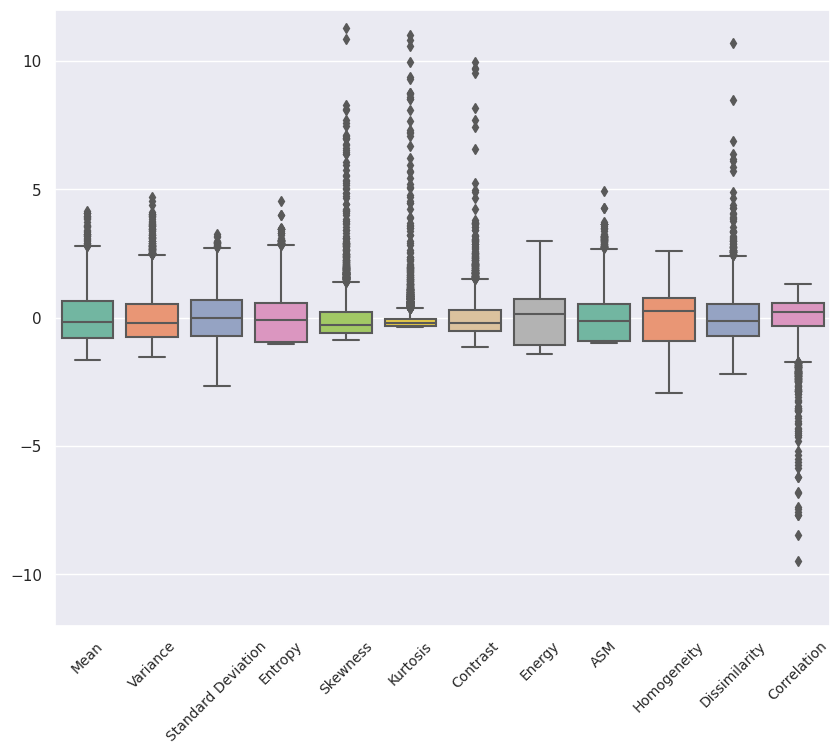

In [ ]:
ax = plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10);

# setting y-axis limits for clearer graph
ax.set_ylim(-12, 12) 

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


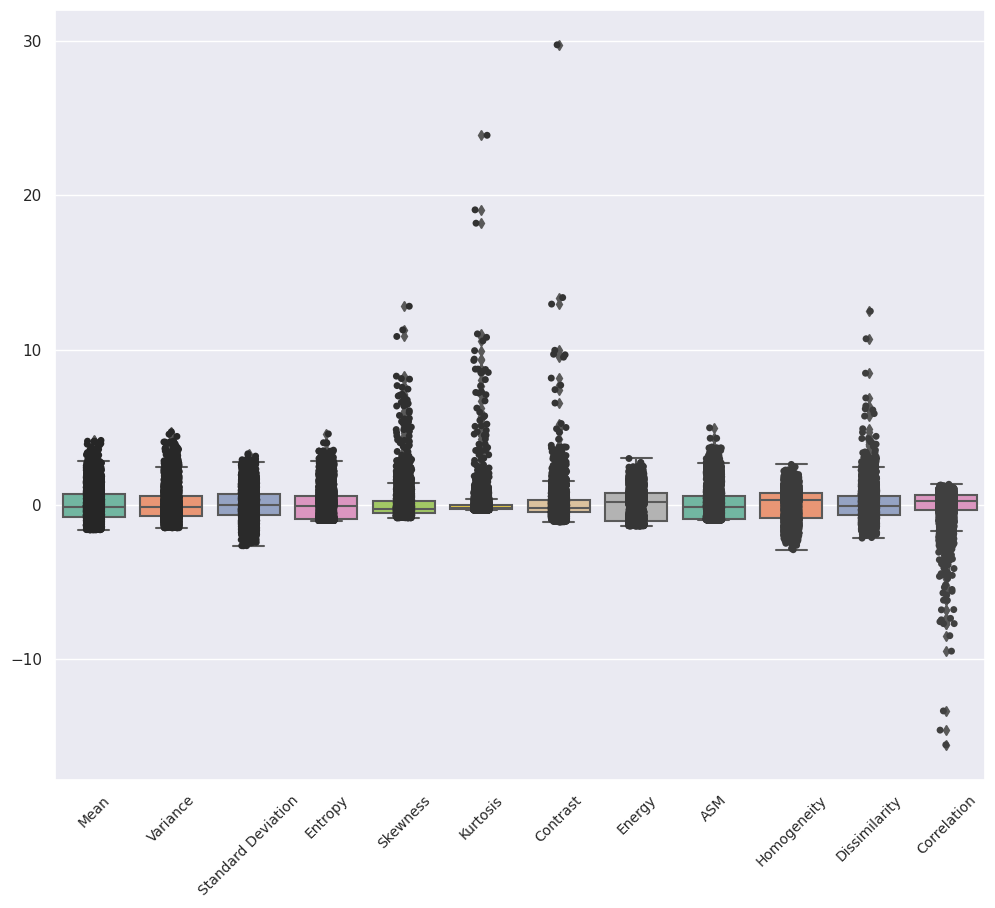

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure(figsize=(12, 10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10);

**Correlation Matrix**

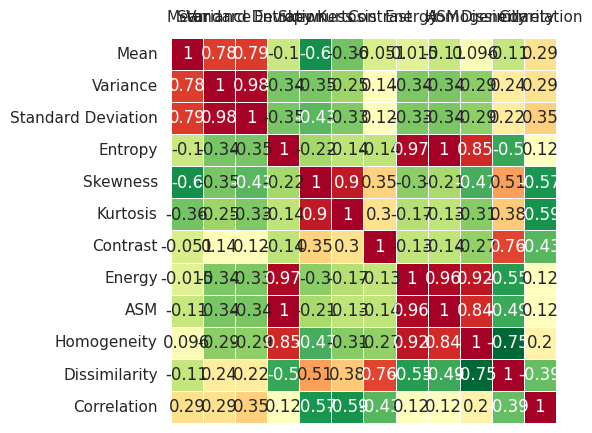

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

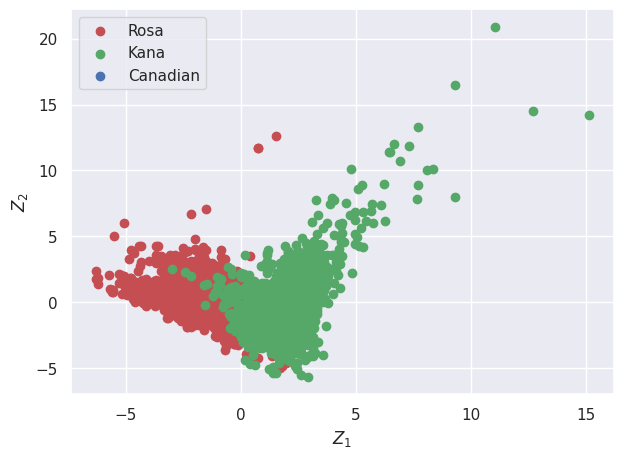

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

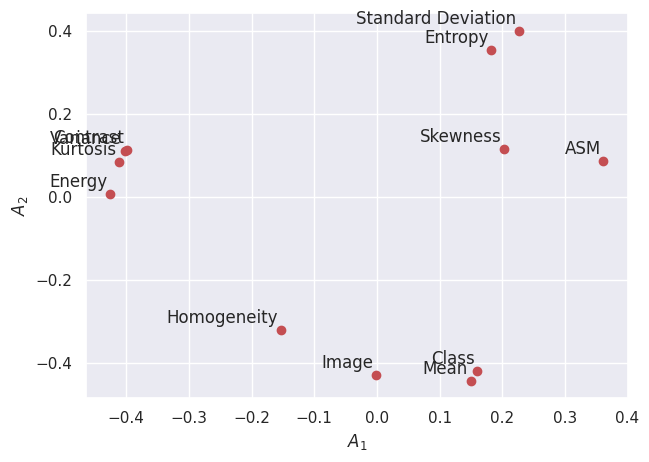

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


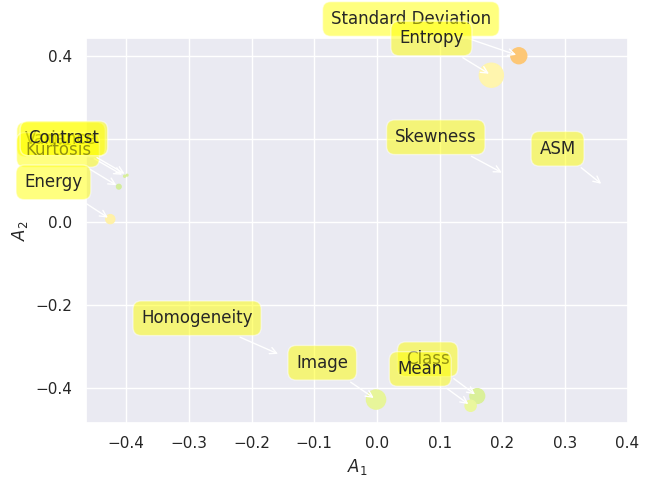

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

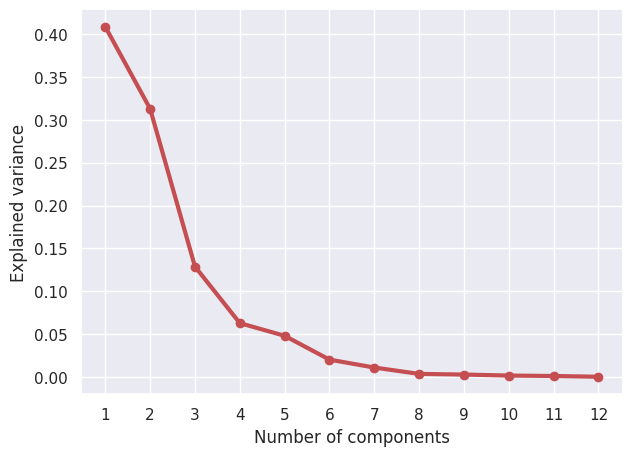

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

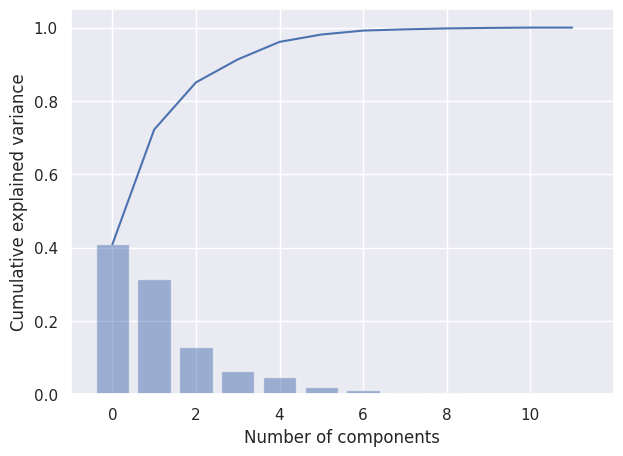

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

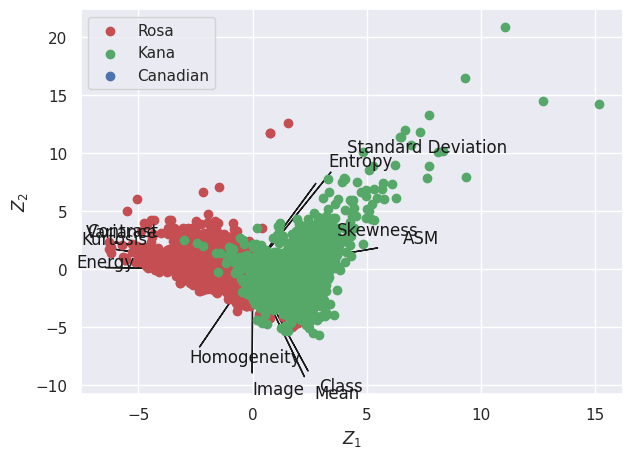

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0    -1.134947  0.116539 -0.122074 -0.306272  0.987701
1    -4.262143 -0.049437  1.500706  0.313062  1.862962
2     2.481383 -1.111446 -0.957833 -0.117939  1.167254
3     3.074085 -0.235259 -0.388747 -0.687068  0.955671
4    -0.900927  0.311275  1.345354 -0.830260  1.192911
...        ...       ...       ...       ...       ...
3757  0.321001 -2.161311  1.250400  0.579057 -0.689392
3758  0.205905 -2.131569  1.261261  0.556632 -0.602184
3759  0.203598 -1.775664  1.133058  0.338989 -0.514559
3760  0.273145 -0.655034  1.593303 -0.421314 -0.494440
3761 -0.308959  1.213269  1.325361 -1.094480 -0.161470

[3762 rows x 5 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.10%] of the variance'}, xlabel='PC1 (40.8% expl.var)', ylabel='PC2 (31.2% expl.var)'>)

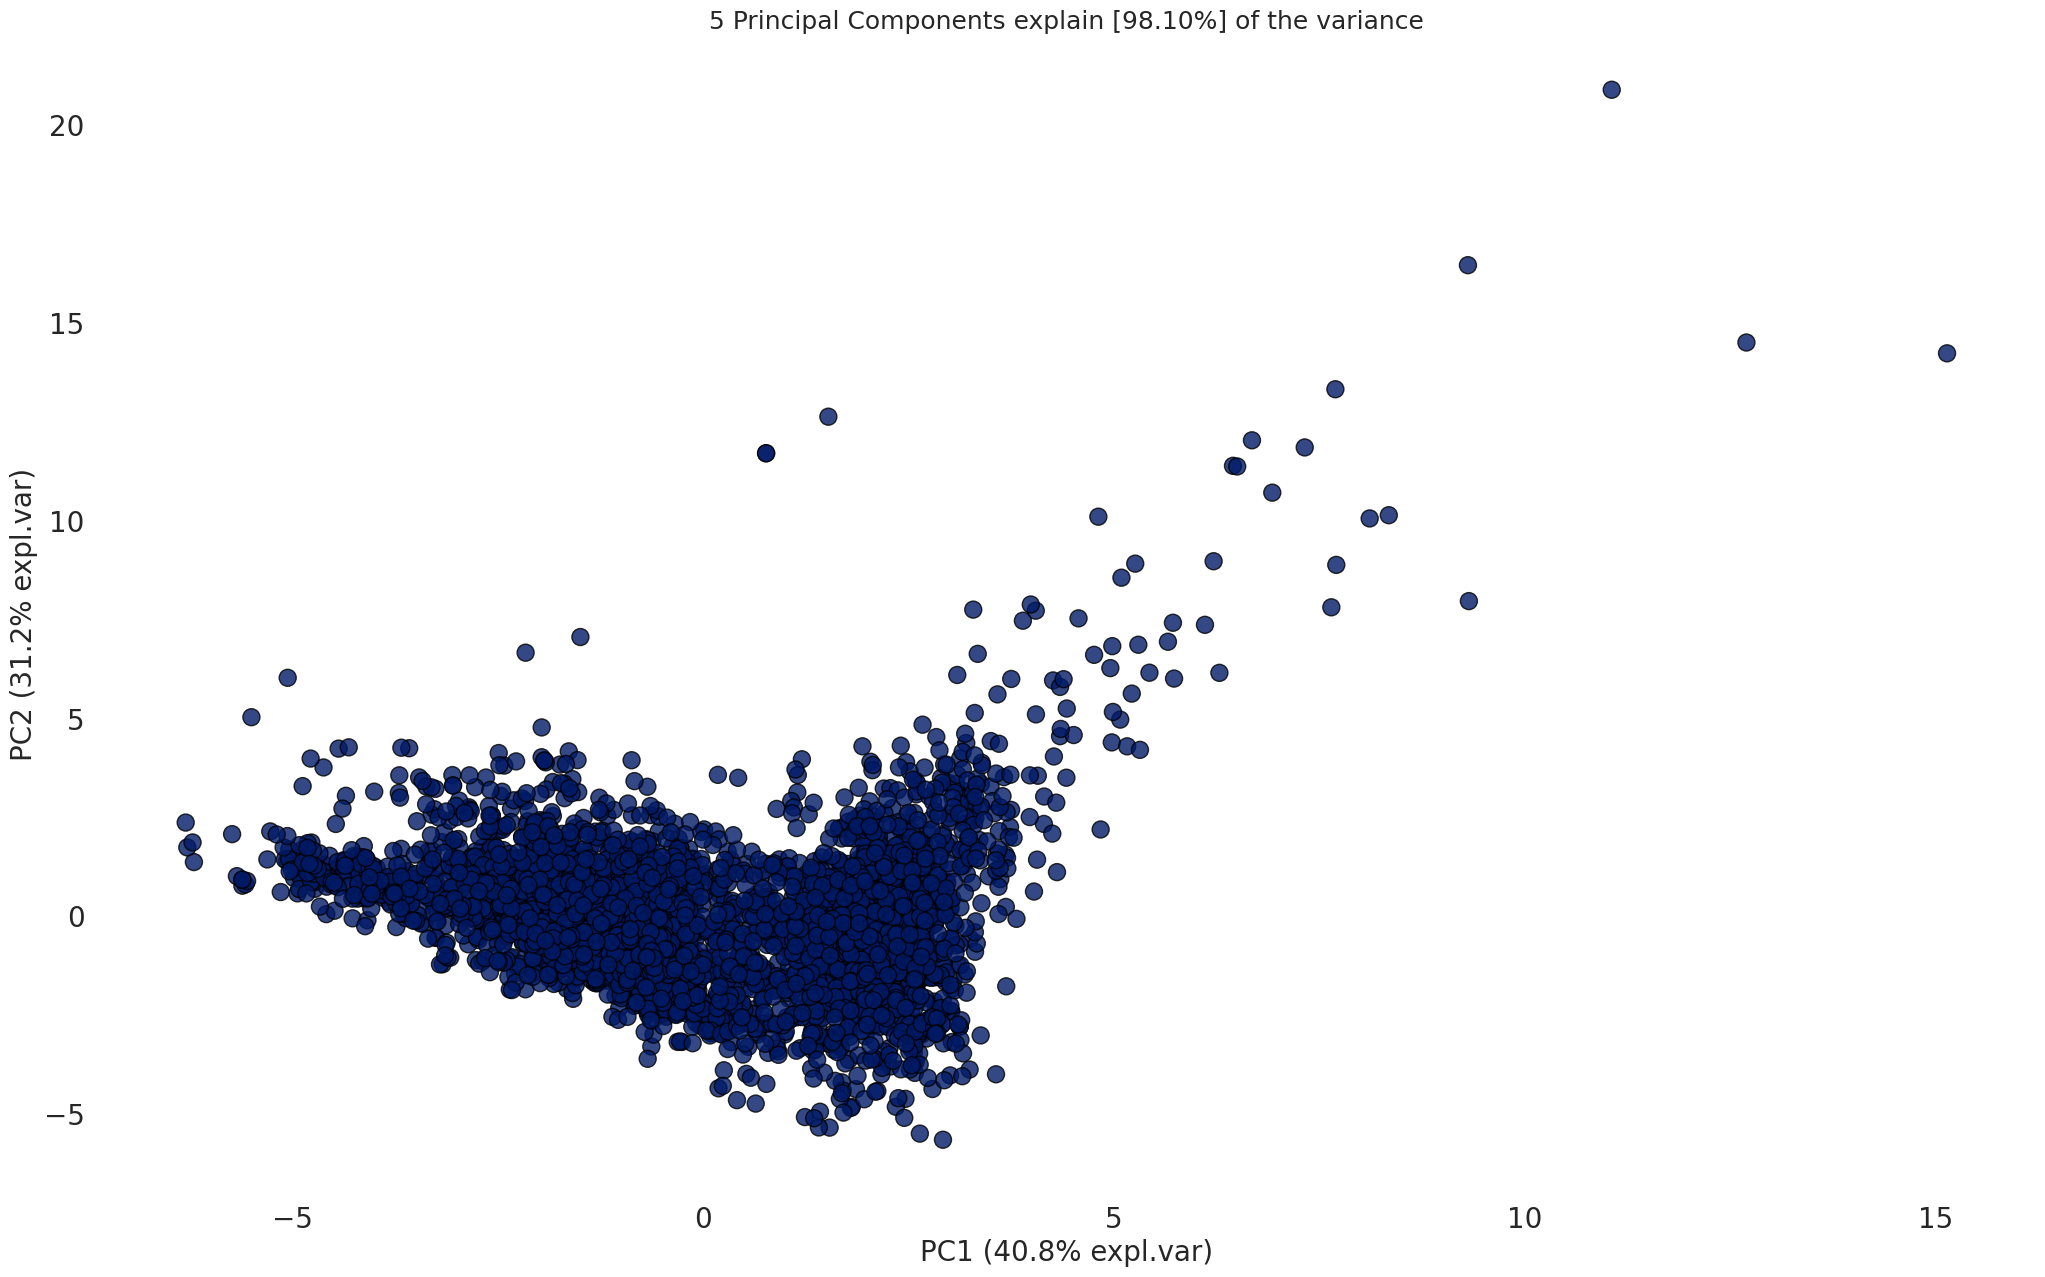

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

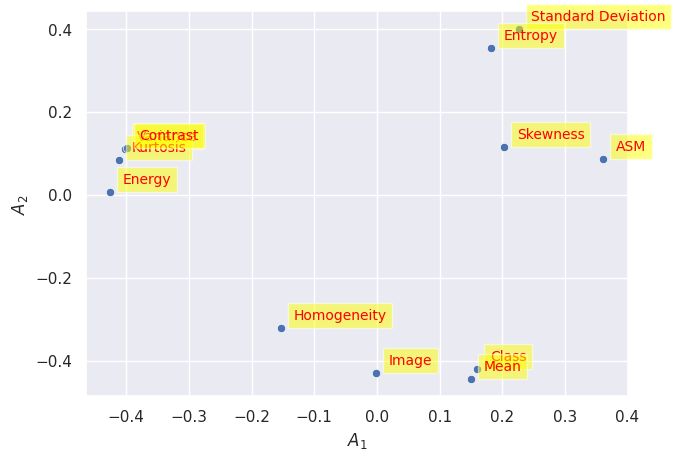

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

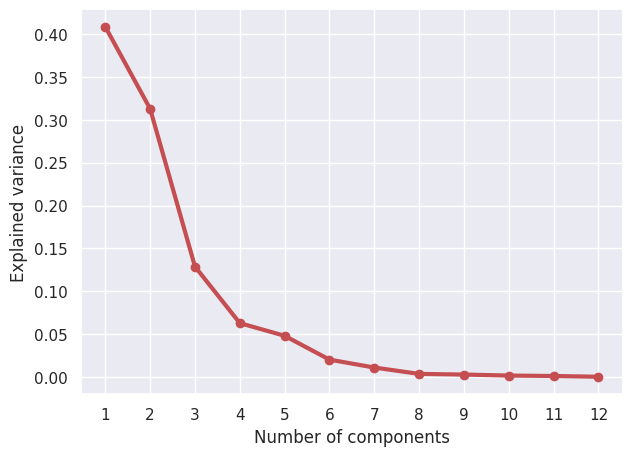

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

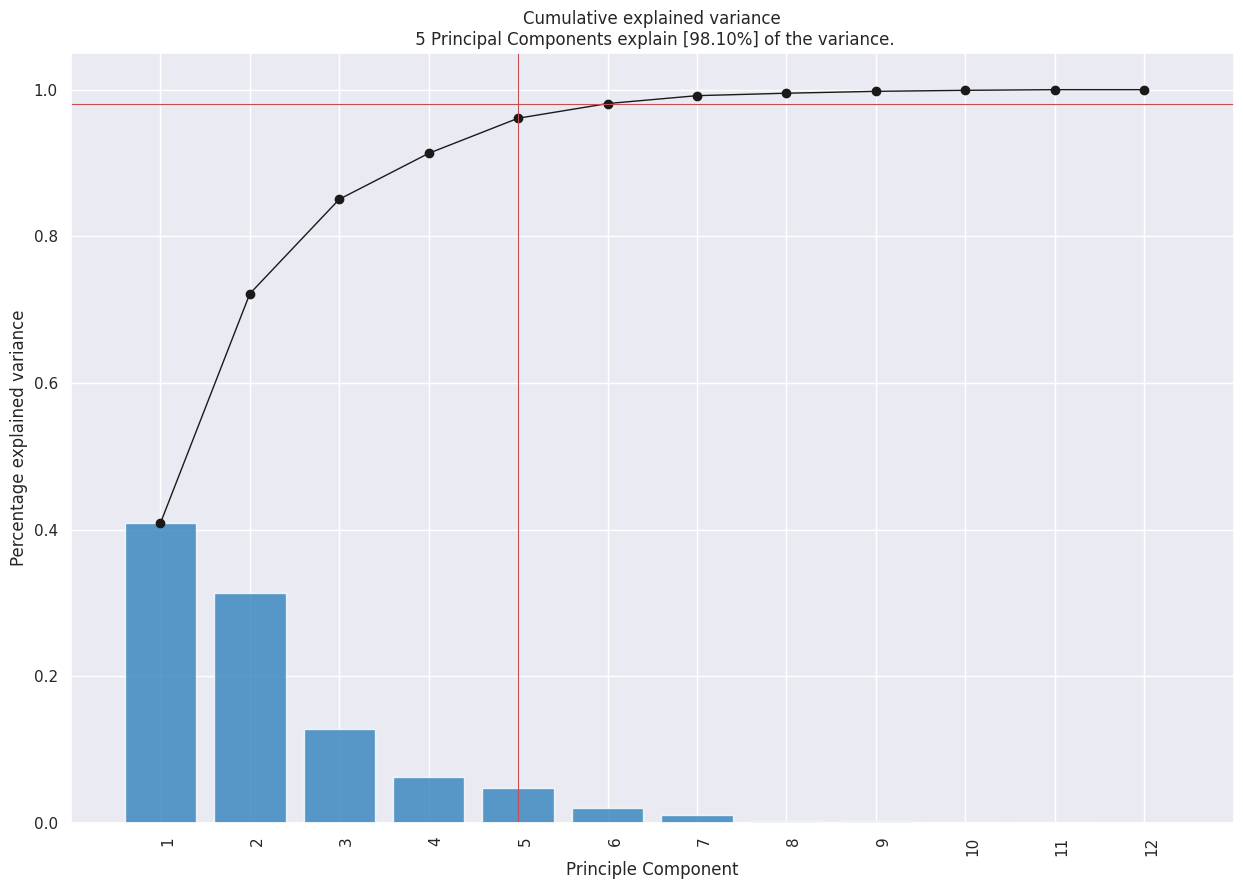

<Figure size 700x500 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


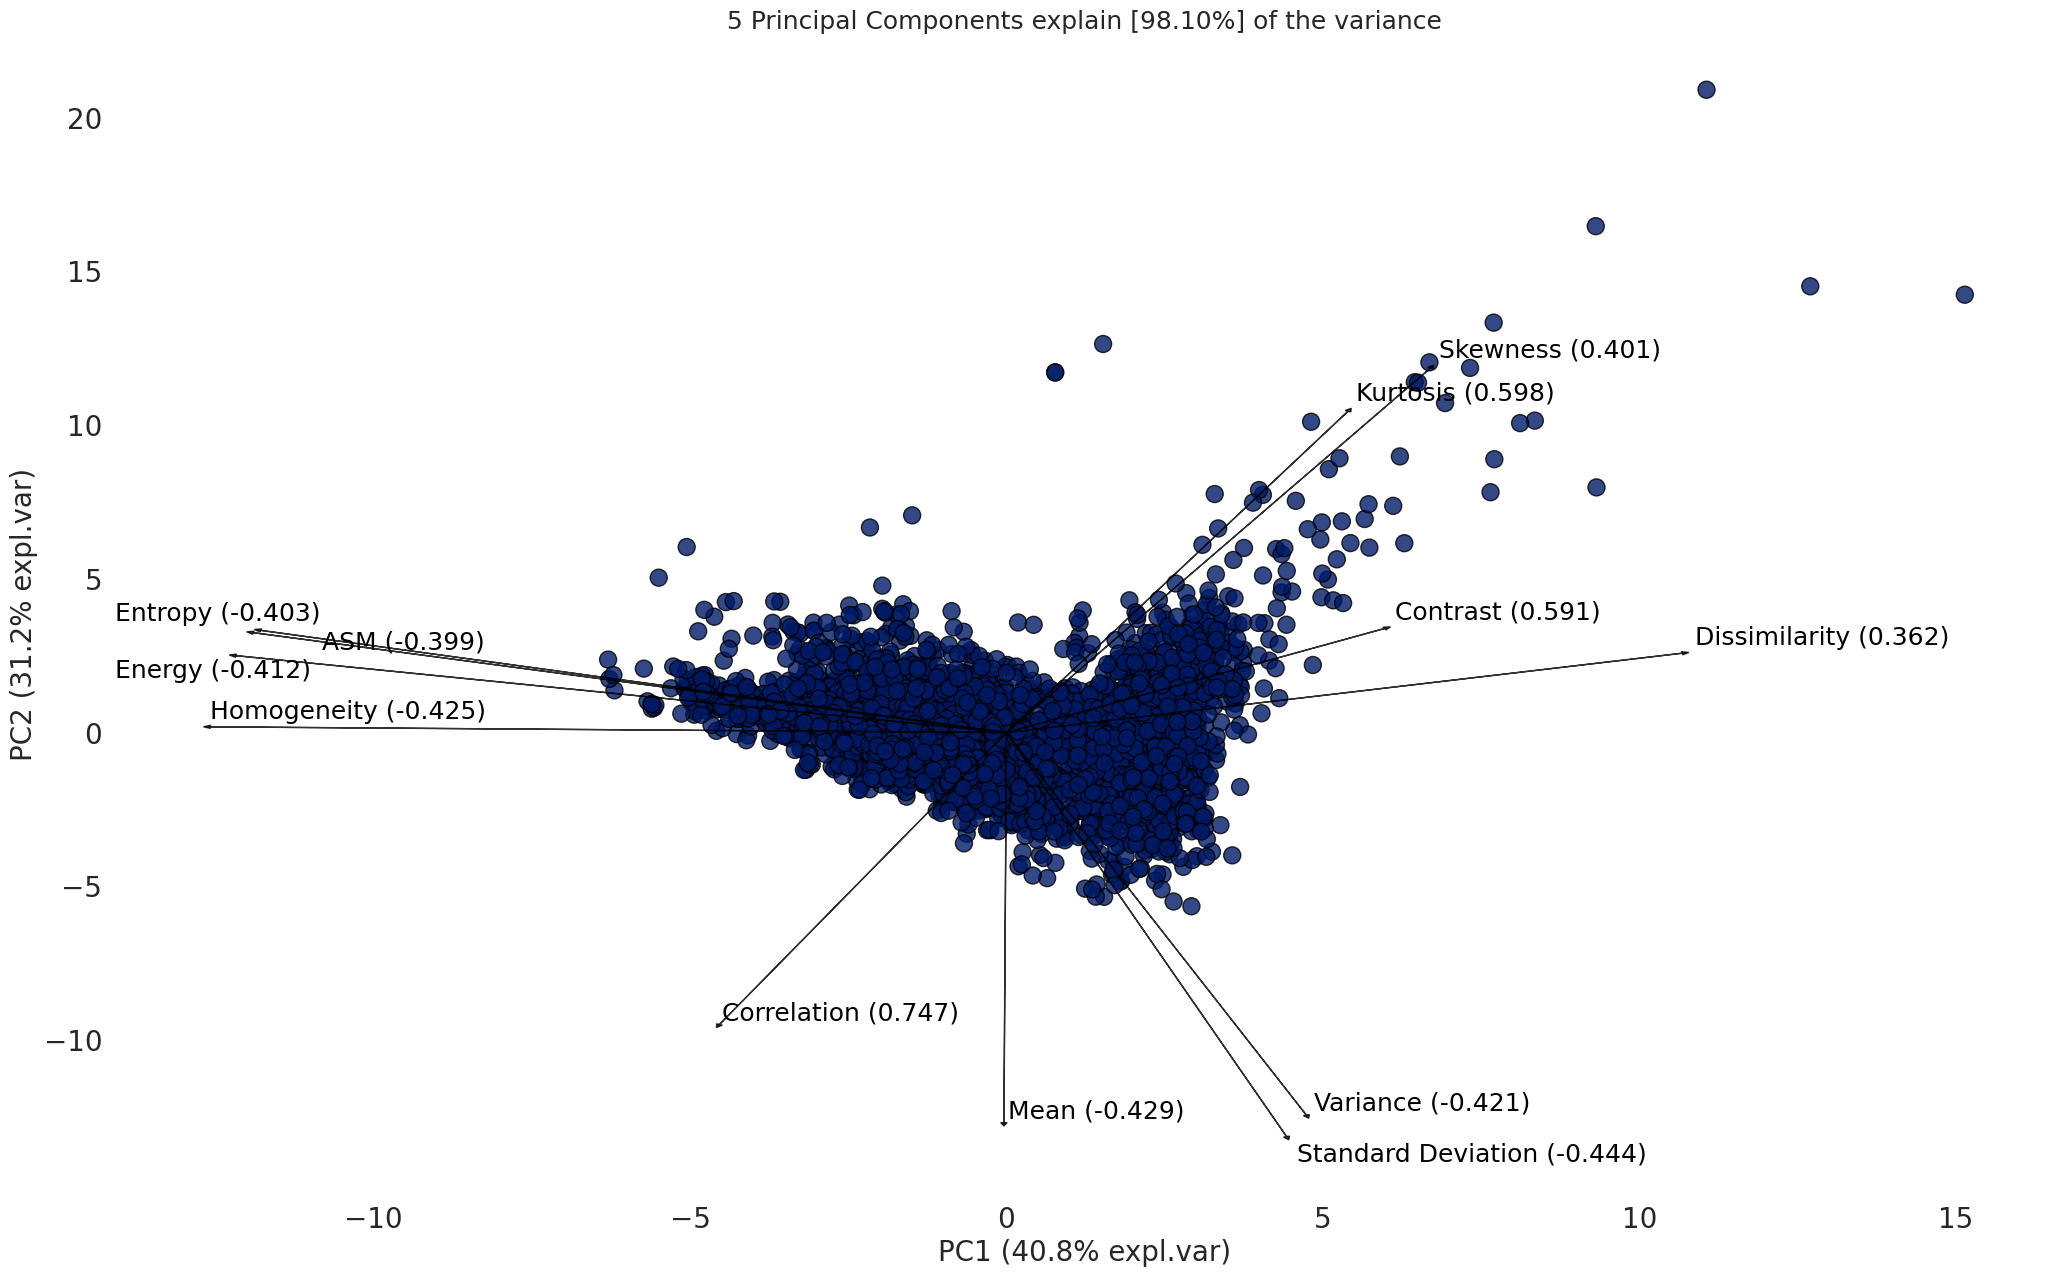

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.10%] of the variance'}, xlabel='PC1 (40.8% expl.var)', ylabel='PC2 (31.2% expl.var)'>)

In [ ]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3386, 14)
Unseen Data For Predictions: (376, 14)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (3386, 14)
5                           Missing Values             False
6                         Numeric Features                12
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (2370, 2381)
12                    Transformed Test Set      (1016, 2381)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              be94
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9878  0.9976  0.9784  0.9944   
xgboost         Extreme Gradient Boosting    0.9861  0.9975  0.9775  0.9916   
ada                  Ada Boost Classifier    0.9848  0.9965  0.9747  0.9916   
rf               Random Forest Classifier    0.9835  0.9974  0.9691  0.9943   
et                 Extra Trees Classifier    0.9831  0.9983  0.9644  0.9981   
dt               Decision Tree Classifier    0.9823  0.9811  0.9691  0.9914   
gbc          Gradient Boosting Classifier    0.9819  0.9922  0.9644  0.9952   
lr                    Logistic Regression    0.9603  0.9927  0.9259  0.9853   
ridge                    Ridge Classifier    0.8831  0.0000  0.8144  0.9190   
knn                K Neighbors Classifier    0.8068  0.8786  0.7319  0.8211   
qda       Quadratic Discriminant Analysis    0.7549  0.7411  0.6026  0.8131   
svm                   SVM - Linear Kernel    0.7392  0.0000  0.7350  0.7639   
dummy                    Dummy Classifier    0.5498  0.5000  0.0000  0.0000   
nb                            Naive Bayes    0.4544  0.5257  1.0000  0.4521   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9863  0.9752  0.9754     0.412  
xgboost   0.9844  0.9718  0.9720    14.273  
ada       0.9830  0.9693  0.9695     1.277  
rf        0.9815  0.9667  0.9670     0.945  
et        0.9809  0.9658  0.9663     1.958  
dt        0.9801  0.9641  0.9644     0.225  
gbc       0.9795  0.9632  0.9637     4.107  
lr        0.9545  0.9194  0.9211     4.206  
ridge     0.8619  0.7613  0.7672     2.360  
knn       0.7731  0.6058  0.6098     0.791  
qda       0.6745  0.4909  0.5156     3.302  
svm       0.6715  0.4699  0.5259     0.557  
dummy     0.0000  0.0000  0.0000     0.040  
nb        0.6227  0.0069  0.0485     0.146

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9789  0.9775  0.9626  0.9904  0.9763  0.9573  0.9576
1       0.9831  0.9830  0.9813  0.9813  0.9813  0.9659  0.9659
2       0.9873  0.9860  0.9720  1.0000  0.9858  0.9744  0.9747
3       0.9873  0.9860  0.9720  1.0000  0.9858  0.9744  0.9747
4       0.9873  0.9868  0.9813  0.9906  0.9859  0.9744  0.9745
5       0.9831  0.9813  0.9626  1.0000  0.9810  0.9658  0.9664
6       0.9831  0.9813  0.9626  1.0000  0.9810  0.9658  0.9664
7       0.9705  0.9688  0.9528  0.9806  0.9665  0.9401  0.9404
8       0.9789  0.9782  0.9717  0.9810  0.9763  0.9573  0.9573
9       0.9831  0.9820  0.9717  0.9904  0.9810  0.9658  0.9659
Mean    0.9823  0.9811  0.9691  0.9914  0.9801  0.9641  0.9644
SD      0.0049  0.0051  0.0085  0.0079  0.0056  0.0100  0.0100

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9747  0.9852  0.9533  0.9903  0.9714  0.9487  0.9493
1       0.9831  0.9858  0.9813  0.9813  0.9813  0.9659  0.9659
2       0.9873  0.9944  0.9907  0.9815  0.9860  0.9745  0.9745
3       0.9831  0.9945  0.9907  0.9725  0.9815  0.9660  0.9661
4       0.9873  0.9912  0.9907  0.9815  0.9860  0.9745  0.9745
5       0.9831  0.9862  0.9720  0.9905  0.9811  0.9659  0.9660
6       0.9831  0.9849  0.9626  1.0000  0.9810  0.9658  0.9664
7       0.9620  0.9751  0.9528  0.9619  0.9573  0.9231  0.9232
8       0.9789  0.9825  0.9717  0.9810  0.9763  0.9573  0.9573
9       0.9873  0.9861  0.9811  0.9905  0.9858  0.9744  0.9744
Mean    0.9810  0.9866  0.9747  0.9831  0.9788  0.9616  0.9618
SD      0.0074  0.0055  0.0140  0.0101  0.0084  0.0149  0.0149

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [ ]:
#Update statmodels
!pip3 install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7975  0.8688  0.6916  0.8315  0.7551  0.5849  0.5921
1       0.8059  0.8710  0.7570  0.8020  0.7788  0.6062  0.6070
2       0.7679  0.8528  0.6916  0.7708  0.7291  0.5272  0.5295
3       0.8312  0.9078  0.7103  0.8941  0.7917  0.6529  0.6652
4       0.8143  0.8877  0.7383  0.8316  0.7822  0.6214  0.6247
5       0.8523  0.9127  0.7944  0.8673  0.8293  0.6996  0.7017
6       0.8354  0.9014  0.7664  0.8542  0.8079  0.6647  0.6677
7       0.7932  0.8612  0.7642  0.7714  0.7678  0.5815  0.5815
8       0.7848  0.8508  0.6698  0.8161  0.7358  0.5572  0.5649
9       0.7848  0.8722  0.7358  0.7723  0.7536  0.5628  0.5633
Mean    0.8068  0.8786  0.7319  0.8211  0.7731  0.6058  0.6098
SD      0.0251  0.0213  0.0379  0.0407  0.0298  0.0511  0.0518

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8101  0.8409  0.6449  0.9079  0.7541  0.6066  0.6301
1       0.7975  0.8472  0.6449  0.8734  0.7419  0.5814  0.5995
2       0.7468  0.8236  0.5234  0.8615  0.6512  0.4705  0.5066
3       0.7975  0.8704  0.5794  0.9538  0.7209  0.5764  0.6206
4       0.7806  0.8585  0.5981  0.8767  0.7111  0.5442  0.5701
5       0.8397  0.9147  0.6636  0.9726  0.7889  0.6669  0.6987
6       0.8017  0.8742  0.6542  0.8750  0.7487  0.5905  0.6075
7       0.8101  0.8340  0.6698  0.8765  0.7594  0.6071  0.6221
8       0.7806  0.8432  0.5472  0.9355  0.6905  0.5379  0.5845
9       0.7848  0.8477  0.6132  0.8667  0.7182  0.5523  0.5739
Mean    0.7949  0.8554  0.6139  0.9000  0.7285  0.5734  0.6014
SD      0.0231  0.0246  0.0482  0.0381  0.0371  0.0495  0.0471

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9662  0.9968  0.9346  0.9901  0.9615  0.9315  0.9327
1       0.9578  0.9931  0.9346  0.9709  0.9524  0.9145  0.9151
2       0.9831  0.9963  0.9626  1.0000  0.9810  0.9658  0.9664
3       0.9662  0.9932  0.9346  0.9901  0.9615  0.9315  0.9327
4       0.9494  0.9971  0.8879  1.0000  0.9406  0.8967  0.9016
5       0.9662  0.9967  0.9439  0.9806  0.9619  0.9316  0.9322
6       0.9536  0.9797  0.8972  1.0000  0.9458  0.9054  0.9095
7       0.9536  0.9928  0.9340  0.9612  0.9474  0.9059  0.9062
8       0.9662  0.9958  0.9245  1.0000  0.9608  0.9312  0.9334
9       0.9409  0.9859  0.9057  0.9600  0.9320  0.8799  0.8810
Mean    0.9603  0.9927  0.9259  0.9853  0.9545  0.9194  0.9211
SD      0.0112  0.0054  0.0216  0.0154  0.0131  0.0228  0.0223

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9789  0.9932  0.9533  1.0000  0.9761  0.9572  0.9581
1       0.9789  0.9966  0.9720  0.9811  0.9765  0.9574  0.9574
2       0.9916  0.9992  0.9813  1.0000  0.9906  0.9829  0.9831
3       0.9789  0.9937  0.9626  0.9904  0.9763  0.9573  0.9576
4       0.9705  0.9976  0.9346  1.0000  0.9662  0.9400  0.9417
5       0.9789  0.9976  0.9626  0.9904  0.9763  0.9573  0.9576
6       0.9873  0.9953  0.9720  1.0000  0.9858  0.9744  0.9747
7       0.9705  0.9946  0.9528  0.9806  0.9665  0.9401  0.9404
8       0.9789  0.9970  0.9528  1.0000  0.9758  0.9571  0.9580
9       0.9705  0.9916  0.9434  0.9901  0.9662  0.9400  0.9409
Mean    0.9785  0.9957  0.9587  0.9933  0.9756  0.9564  0.9570
SD      0.0067  0.0022  0.0134  0.0075  0.0077  0.0135  0.0133

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8281  0.9697  0.8498  0.8395  0.8256  0.7419  0.7496
1       0.8438  0.9219  0.8423  0.8447  0.8439  0.7625  0.7628
2       0.8281  0.9448  0.8393  0.8512  0.8297  0.7412  0.7511
3       0.8438  0.9626  0.8362  0.8449  0.8424  0.7604  0.7624
4       0.7500  0.9171  0.7464  0.7536  0.7505  0.6168  0.6177
5       0.8125  0.9366  0.8129  0.8336  0.8148  0.7167  0.7250
6       0.8594  0.9437  0.8464  0.8764  0.8595  0.7828  0.7915
7       0.8750  0.9446  0.8821  0.8738  0.8733  0.8108  0.8117
8       0.8281  0.9600  0.8303  0.8404  0.8308  0.7404  0.7440
9       0.8254  0.9395  0.8291  0.8298  0.8257  0.7317  0.7337
Mean    0.8294  0.9441  0.8315  0.8388  0.8296  0.7405  0.7450
SD      0.0316  0.0160  0.0330  0.0320  0.0311  0.0485  0.0490

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7031  0.8896  0.7276  0.7318  0.7002  0.5567  0.5706
1       0.7344  0.8949  0.7464  0.7510  0.7351  0.6012  0.6074
2       0.7969  0.9173  0.8106  0.8160  0.7987  0.6931  0.7011
3       0.7500  0.8735  0.7592  0.7678  0.7543  0.6203  0.6247
4       0.6719  0.8064  0.6694  0.6792  0.6749  0.5006  0.5011
5       0.7500  0.8702  0.7470  0.7483  0.7452  0.6165  0.6203
6       0.7812  0.8759  0.7803  0.7880  0.7835  0.6664  0.6672
7       0.6250  0.8385  0.6386  0.6287  0.6215  0.4382  0.4416
8       0.7031  0.8599  0.7028  0.7035  0.7030  0.5503  0.5505
9       0.7619  0.8817  0.7595  0.7638  0.7562  0.6329  0.6392
Mean    0.7278  0.8708  0.7342  0.7378  0.7273  0.5876  0.5924
SD      0.0497  0.0293  0.0489  0.0520  0.0505  0.0733  0.0741

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8281  0.9579  0.8430  0.8447  0.8298  0.7407  0.7476
1       0.8438  0.9385  0.8416  0.8535  0.8433  0.7627  0.7681
2       0.8438  0.9496  0.8528  0.8451  0.8436  0.7633  0.7642
3       0.8125  0.9166  0.8112  0.8118  0.8097  0.7129  0.7153
4       0.7500  0.9069  0.7433  0.7507  0.7472  0.6159  0.6190
5       0.7969  0.9131  0.7977  0.8069  0.7992  0.6938  0.6961
6       0.8281  0.9346  0.8093  0.8792  0.8276  0.7315  0.7601
7       0.8125  0.9405  0.8231  0.8117  0.8084  0.7172  0.7204
8       0.7500  0.9368  0.7528  0.7582  0.7518  0.6227  0.6248
9       0.8254  0.9249  0.8176  0.8556  0.8182  0.7279  0.7504
Mean    0.8091  0.9319  0.8092  0.8217  0.8079  0.7089  0.7166
SD      0.0325  0.0155  0.0347  0.0401  0.0323  0.0491  0.0523

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='RiskLevel', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target         RiskLevel
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data         (1014, 7)
5                           Missing Values             False
6                         Numeric Features                 3
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (709, 3)
12                    Transformed Test Set          (305, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              57a1
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='RiskLevel',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('dummy', Dummify(target='RiskLevel')),
                ('fix_perfect', Remove_100(target='RiskLevel')),
                ('clean_names', Clean_Colum_Names()),

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8237  0.9321  0.8282  0.8287   
lightgbm  Light Gradient Boosting Machine    0.8081  0.9233  0.8165  0.8150   
xgboost         Extreme Gradient Boosting    0.8068  0.9261  0.8150  0.8130   
rf               Random Forest Classifier    0.8067  0.9278  0.8161  0.8127   
dt               Decision Tree Classifier    0.8010  0.8836  0.8081  0.8075   
gbc          Gradient Boosting Classifier    0.7870  0.9000  0.7943  0.7897   
knn                K Neighbors Classifier    0.6854  0.8504  0.6875  0.6932   
ada                  Ada Boost Classifier    0.6685  0.7538  0.6703  0.6594   
ridge                    Ridge Classifier    0.5994  0.0000  0.5834  0.5924   
lr                    Logistic Regression    0.5923  0.7298  0.5780  0.5776   
qda       Quadratic Discriminant Analysis    0.5853  0.7530  0.5624  0.5839   
svm                   SVM - Linear Kernel    0.5839  0.0000  0.5799  0.5780   
lda          Linear Discriminant Analysis    0.5825  0.7406  0.5616  0.5872   
nb                            Naive Bayes    0.5811  0.7335  0.5619  0.5828   
dummy                    Dummy Classifier    0.4034  0.5000  0.3333  0.1628   

              F1   Kappa     MCC  TT (Sec)  
et        0.8241  0.7317  0.7337     0.181  
lightgbm  0.8084  0.7089  0.7118     0.213  
xgboost   0.8070  0.7070  0.7099     0.287  
rf        0.8066  0.7072  0.7102     0.253  
dt        0.8013  0.6977  0.7005     0.023  
gbc       0.7871  0.6763  0.6774     0.303  
knn       0.6861  0.5186  0.5209     0.037  
ada       0.6506  0.4908  0.5022     0.091  
ridge     0.5629  0.3716  0.4018     0.020  
lr        0.5652  0.3635  0.3815     0.033  
qda       0.5593  0.3480  0.3677     0.013  
svm       0.5534  0.3549  0.3774     0.027  
lda       0.5590  0.3439  0.3650     0.013  
nb        0.5558  0.3427  0.3644     0.020  
dummy     0.2319  0.0000  0.0000     0.017

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7042  0.8769  0.7109  0.7048  0.6901  0.5472  0.5599
1       0.6761  0.8408  0.6792  0.6624  0.6355  0.5038  0.5311
2       0.6901  0.8658  0.6897  0.6862  0.6798  0.5268  0.5339
3       0.7183  0.8601  0.7190  0.7172  0.7115  0.5689  0.5738
4       0.6761  0.8143  0.6816  0.6701  0.6591  0.5060  0.5157
5       0.7606  0.9028  0.7618  0.7670  0.7479  0.6329  0.6454
6       0.7324  0.8620  0.7435  0.7332  0.7180  0.5897  0.6014
7       0.5634  0.7375  0.5795  0.5385  0.5386  0.3340  0.3419
8       0.7183  0.8277  0.7133  0.7227  0.7087  0.5673  0.5766
9       0.7000  0.8435  0.7024  0.6948  0.6834  0.5435  0.5541
Mean    0.6939  0.8431  0.6981  0.6897  0.6773  0.5320  0.5434
SD      0.0499  0.0425  0.0466  0.0583  0.0551  0.0756  0.0760

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 11.0 MB/s eta 0:00:00


In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8028  0.9429  0.8025  0.8044  0.8021  0.6991  0.7006
1       0.8169  0.9370  0.8221  0.8197  0.8176  0.7231  0.7237
2       0.8028  0.9403  0.8025  0.8043  0.8028  0.7019  0.7025
3       0.8310  0.9369  0.8380  0.8336  0.8314  0.7435  0.7444
4       0.8169  0.9261  0.8265  0.8243  0.8160  0.7243  0.7285
5       0.8592  0.9536  0.8708  0.8684  0.8609  0.7854  0.7885
6       0.8169  0.9327  0.8364  0.8268  0.8150  0.7233  0.7301
7       0.7746  0.8643  0.7947  0.7880  0.7750  0.6601  0.6657
8       0.7746  0.9211  0.7854  0.7793  0.7744  0.6567  0.6593
9       0.7714  0.9232  0.7817  0.7783  0.7703  0.6545  0.6588
Mean    0.8067  0.9278  0.8161  0.8127  0.8066  0.7072  0.7102
SD      0.0264  0.0231  0.0264  0.0264  0.0269  0.0399  0.0395

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7746  0.8929  0.7807  0.7839  0.7776  0.6572  0.6586
1       0.6901  0.8492  0.7086  0.6821  0.6818  0.5341  0.5372
2       0.7324  0.9074  0.7241  0.7354  0.7337  0.5942  0.5943
3       0.7887  0.9088  0.7944  0.7978  0.7904  0.6809  0.6836
4       0.6338  0.7960  0.6259  0.6469  0.6260  0.4399  0.4483
5       0.7606  0.8798  0.7856  0.7797  0.7588  0.6399  0.6500
6       0.7183  0.8669  0.7297  0.7123  0.7132  0.5720  0.5736
7       0.6056  0.7598  0.6167  0.6179  0.6098  0.3992  0.4008
8       0.7183  0.8670  0.7253  0.7264  0.7198  0.5731  0.5753
9       0.6000  0.8204  0.6250  0.6145  0.5976  0.4010  0.4069
Mean    0.7023  0.8548  0.7116  0.7097  0.7009  0.5492  0.5529
SD      0.0649  0.0466  0.0645  0.0643  0.0661  0.0985  0.0980

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


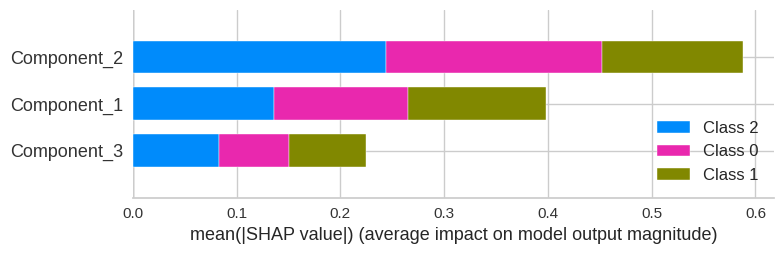

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

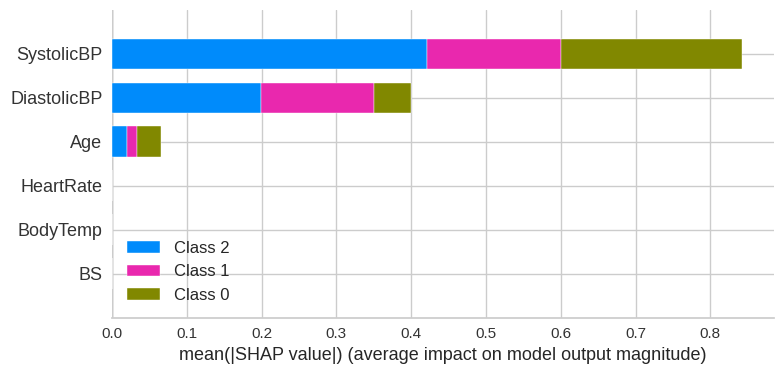

In [ ]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('RiskLevel', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

NameError: ignored